# Deriving maximum insights from the BillionairesIndex where it thas the details of top billionaires 

In [1]:
#https://www.kaggle.com/kkhandekar/billionaires-index

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

In [3]:
import numpy as np


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [5]:
import seaborn as sns

# Perform data preparation and cleaning using pandas and numpy

In [6]:
df=pd.read_csv("BillionairesIndex.csv",index_col='Rank')
df

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
Rank,,,,,,
1,Elon Musk,$311B,+$9.32B,+$141B,UnitedStates,Technology
2,Jeff Bezos,$195B,-$3.79B,+$5.06B,UnitedStates,Technology
3,Bernard Arnault,$167B,-$544M,+$52.7B,France,Consumer
4,Bill Gates,$136B,+$906M,+$4.40B,UnitedStates,Technology
5,Larry Page,$131B,+$1.71B,+$48.7B,UnitedStates,Technology
...,...,...,...,...,...,...
496,Barry Diller,$5.92B,-$73.5M,+$366M,UnitedStates,Technology
497,Cliff Obrecht,$5.89B,$0,+$4.99B,Australia,Services
498,Melanie Perkins,$5.89B,$0,+$4.99B,Australia,Services


# Basic informations from the given dataset

In [7]:
df.shape

(500, 6)

In [8]:
#helps to know number of null values and the clumns dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             500 non-null    object
 1   Total_Net_Worth  500 non-null    object
 2   LastChange       500 non-null    object
 3   YTDChange        500 non-null    object
 4   Country          500 non-null    object
 5   Industry         500 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [9]:
#to know all the column names as a list
df.columns.tolist()

['Name', 'Total_Net_Worth', 'LastChange', 'YTDChange', 'Country', 'Industry']

In [10]:
#top 5 billionaires are
df.head()

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
Rank,,,,,,
1,Elon Musk,$311B,+$9.32B,+$141B,UnitedStates,Technology
2,Jeff Bezos,$195B,-$3.79B,+$5.06B,UnitedStates,Technology
3,Bernard Arnault,$167B,-$544M,+$52.7B,France,Consumer
4,Bill Gates,$136B,+$906M,+$4.40B,UnitedStates,Technology
5,Larry Page,$131B,+$1.71B,+$48.7B,UnitedStates,Technology


In [11]:
#bottom 5 billionaires of 500 people
df.tail()

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
Rank,,,,,,
496,Barry Diller,$5.92B,-$73.5M,+$366M,UnitedStates,Technology
497,Cliff Obrecht,$5.89B,$0,+$4.99B,Australia,Services
498,Melanie Perkins,$5.89B,$0,+$4.99B,Australia,Services
499,Trevor Rees-Jones,$5.89B,-$106M,+$898M,UnitedStates,Energy
500,Frits Goldschmeding,$5.88B,-$90.7M,+$621M,Netherlands,Retail


In [12]:
#statistical analysis of the dataset
df.describe(include=['object', 'int64', 'float64'])

,Name,Total_Net_Worth,LastChange,YTDChange,Country,Industry
count,500,500,500,500,500,500
unique,500,333,402,412,49,16
top,Elon Musk,$11.2B,$0,+$1.10B,UnitedStates,Technology
freq,1,6,46,4,170,87


In [13]:
#printing row wise values
df.values

array([['Elon Musk ', '$311B', '+$9.32B', '+$141B', 'UnitedStates',
        'Technology'],
       ['Jeff Bezos ', '$195B', '-$3.79B', '+$5.06B', 'UnitedStates',
        'Technology'],
       ['Bernard Arnault ', '$167B', '-$544M', '+$52.7B', 'France',
        'Consumer'],
       ...,
       ['Melanie Perkins ', '$5.89B', '$0 ', '+$4.99B', 'Australia',
        'Services'],
       ['Trevor Rees-Jones ', '$5.89B', '-$106M', '+$898M',
        'UnitedStates', 'Energy'],
       ['Frits Goldschmeding ', '$5.88B', '-$90.7M', '+$621M',
        'Netherlands', 'Retail']], dtype=object)

In [14]:
#printing single single values
df.values[0][1]

'$311B'

In [15]:
df.columns

Index(['Name', 'Total_Net_Worth', 'LastChange', 'YTDChange', 'Country',
       'Industry'],
      dtype='object')

# Deriving simple insights 

# Single Column Wise


##### Columns's we'll analyze : 
                        1.Name
                        2.Total_Net_Worth
                        3.Country
                        4.Industry

##### Removing the unwanted columns

In [16]:
#deleting the useless columns
df.drop(['LastChange','YTDChange'], inplace=True, axis=1)


In [17]:
#checking whether the columns has been removed
df.shape[1]

4

##### Name

In [18]:
#listing the billionaires name
df['Name'].unique()

array(['Elon Musk ', 'Jeff Bezos ', 'Bernard Arnault ', 'Bill Gates ',
       'Larry Page ', 'Sergey Brin ', 'Mark Zuckerberg ',
       'Steve Ballmer ', 'Larry Ellison ', 'Warren Buffett ',
       'Mukesh Ambani ', 'Francoise Bettencourt Meyers', 'Gautam Adani ',
       'Amancio Ortega ', 'Jim Walton ', 'Rob Walton ', 'Zhong Shanshan ',
       'Alice Walton ', 'Carlos Slim ', 'Phil Knight&family ',
       'Charles Koch ', 'Julia Flesher Koch&family', 'Zeng Yuqun ',
       'MacKenzie Scott ', 'Michael Dell ', 'Francois Pinault ',
       'Ma Huateng ', 'Jacqueline Badger Mars', 'John Mars ',
       'Len Blavatnik ', 'Zhang Yiming ', 'Jack Ma ',
       'Stephen Schwarzman ', 'Azim Premji ', 'Klaus-Michael Kuehne ',
       'Giovanni Ferrero&family ', 'Tadashi Yanai ',
       'Takemitsu Takizaki ', 'Leonard Lauder ', 'Leonid Mikhelson ',
       'Leonardo Del Vecchio', 'Vladimir Potanin ', 'Pallonji Mistry ',
       'William Ding ', 'Colin Huang ', 'Li Ka-shing ', 'Li Shu Fu',
       'Alain

In [19]:
#sorting the df by name od the bilionaires
df.sort_values('Name')

,Name,Total_Net_Worth,Country,Industry
Rank,,,,
456,Abhay Vakil&family,$6.32B,India,Industrial
61,Abigail Johnson,$27.4B,UnitedStates,Finance
468,Agnete Kirk Thinggaard,$6.19B,Denmark,Consumer
367,Alain Merieux,$7.55B,France,Health Care
48,Alain Wertheimer,$30.6B,France,Consumer
...,...,...,...,...
93,Zhang Zhidong,$20.8B,China,Technology
344,Zhao Yan,$8.03B,China,Health Care
256,Zhong Huijuan,$9.74B,China,Health Care


In [20]:

# String to be searched in start of string 
search ="R"
  
# boolean series returned with False at place of NaN
bool_series = df["Name"].str.startswith(search, na = False)
  
# displaying filtered dataframe
print(" No.of.billionaires with R as first letter of their name  : ",df[bool_series].shape[0])
df[bool_series]

 No.of.billionaires with R as first letter of their name  :  30


,Name,Total_Net_Worth,Country,Industry
Rank,,,,
16,Rob Walton,$66.0B,UnitedStates,Retail
71,Radhakishan Damani,$24.3B,India,Retail
103,Robert Kuok,$19.0B,Malaysia,Diversified
106,Roman Abramovich,$18.9B,RussianFederation,Diversified
117,Richard Liu,$17.7B,China,Technology
133,Ray Dalio,$15.6B,UnitedStates,Finance
139,Ricardo Salinas,$15.0B,Mexico,Diversified
157,Reinhold Wuerth,$13.8B,Germany,Industrial
165,Robert Pera,$13.4B,UnitedStates,Technology


##### Total_Net_Worth

In [21]:
df.dtypes

Name               object
Total_Net_Worth    object
Country            object
Industry           object
dtype: object

In [22]:
#deleting the extra symbols and alphabets from the column
df['Total_Net_Worth']=df['Total_Net_Worth'].str.replace('[$,B]', '')
df

/var/folders/gg/g5t0k9gd405_2k5b98s3qdkm0000gp/T/ipykernel_1319/466760261.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_Net_Worth']=df['Total_Net_Worth'].str.replace('[$,B]', '')


,Name,Total_Net_Worth,Country,Industry
Rank,,,,
1,Elon Musk,311,UnitedStates,Technology
2,Jeff Bezos,195,UnitedStates,Technology
3,Bernard Arnault,167,France,Consumer
4,Bill Gates,136,UnitedStates,Technology
5,Larry Page,131,UnitedStates,Technology
...,...,...,...,...
496,Barry Diller,5.92,UnitedStates,Technology
497,Cliff Obrecht,5.89,Australia,Services
498,Melanie Perkins,5.89,Australia,Services


In [23]:
#converting the dtype from object to integer for further analysis
df['Total_Net_Worth']=pd.to_numeric(df['Total_Net_Worth'])


In [24]:
#checking whether its been changed
df.dtypes

Name                object
Total_Net_Worth    float64
Country             object
Industry            object
dtype: object

In [25]:
#man with highest Total_Net_Worth 
df.iloc[[df['Total_Net_Worth'].argmax()]]['Name']

Rank
1    Elon Musk 
Name: Name, dtype: object

In [26]:
##man with lowest Total_Net_Worth 
df[df['Total_Net_Worth']==df['Total_Net_Worth'].min()]

,Name,Total_Net_Worth,Country,Industry
Rank,,,,
466,Arthur Irving,4.34,Canada,Energy


##### Country

In [27]:
#different countries that took place in this list are 
print("No.of.different countries are : ",df['Country'].nunique())
print("They are")
df['Country'].unique()

No.of.different countries are :  49
They are


array(['UnitedStates', 'France', 'India', 'Spain', 'China', 'Mexico',
       'HongKong', 'Germany', 'Italy', 'Japan', 'RussianFederation',
       'Ireland', 'Australia', 'UnitedKingdom', 'Brazil', 'Switzerland',
       'Chile', 'Singapore', 'Sweden', 'Nigeria', 'Malaysia', 'Indonesia',
       'SaudiArabia', 'Netherlands', 'Greece', 'Thailand', 'Austria',
       'Canada', 'Taiwan', 'Israel', 'Colombia', 'Korea', 'Ukraine',
       'Denmark', 'Monaco', 'SouthAfrica', 'Cyprus', 'New Zealand',
       'VietNam', 'Philippines', 'Kazakhstan', 'Georgia', 'Egypt',
       'Norway', 'Argentina', 'Cayman', 'UAE', 'SouthKorea', 'Finland'],
      dtype=object)

In [28]:
#top 5 country with highest participation
df['Country'].value_counts().head(5)

UnitedStates         170
China                 81
RussianFederation     27
Germany               25
India                 19
Name: Country, dtype: int64

In [29]:
#last 5 country with lowest participation
df['Country'].value_counts().tail(5)

Monaco     1
Ukraine    1
Nigeria    1
Chile      1
Finland    1
Name: Country, dtype: int64

In [30]:
#No.of.Billionaires from India are
print('No.of.billionaires from India are : ',df[df['Country']=='India'].shape[0])


No.of.billionaires from India are :  19


UnitedStates         170
China                 81
RussianFederation     27
Germany               25
India                 19
France                16
HongKong              16
UnitedKingdom         15
Canada                13
Australia             10
Sweden                 9
Switzerland            9
Japan                  6
Mexico                 6
Denmark                6
Taiwan                 5
Italy                  5
Brazil                 5
Singapore              5
Israel                 4
Ireland                4
SouthAfrica            3
Korea                  3
Norway                 3
Austria                2
Colombia               2
UAE                    2
Thailand               2
Netherlands            2
SaudiArabia            2
Indonesia              2
Malaysia               2
Spain                  2
Georgia                2
Cayman                 1
Kazakhstan             1
Argentina              1
SouthKorea             1
Egypt                  1
Greece                 1


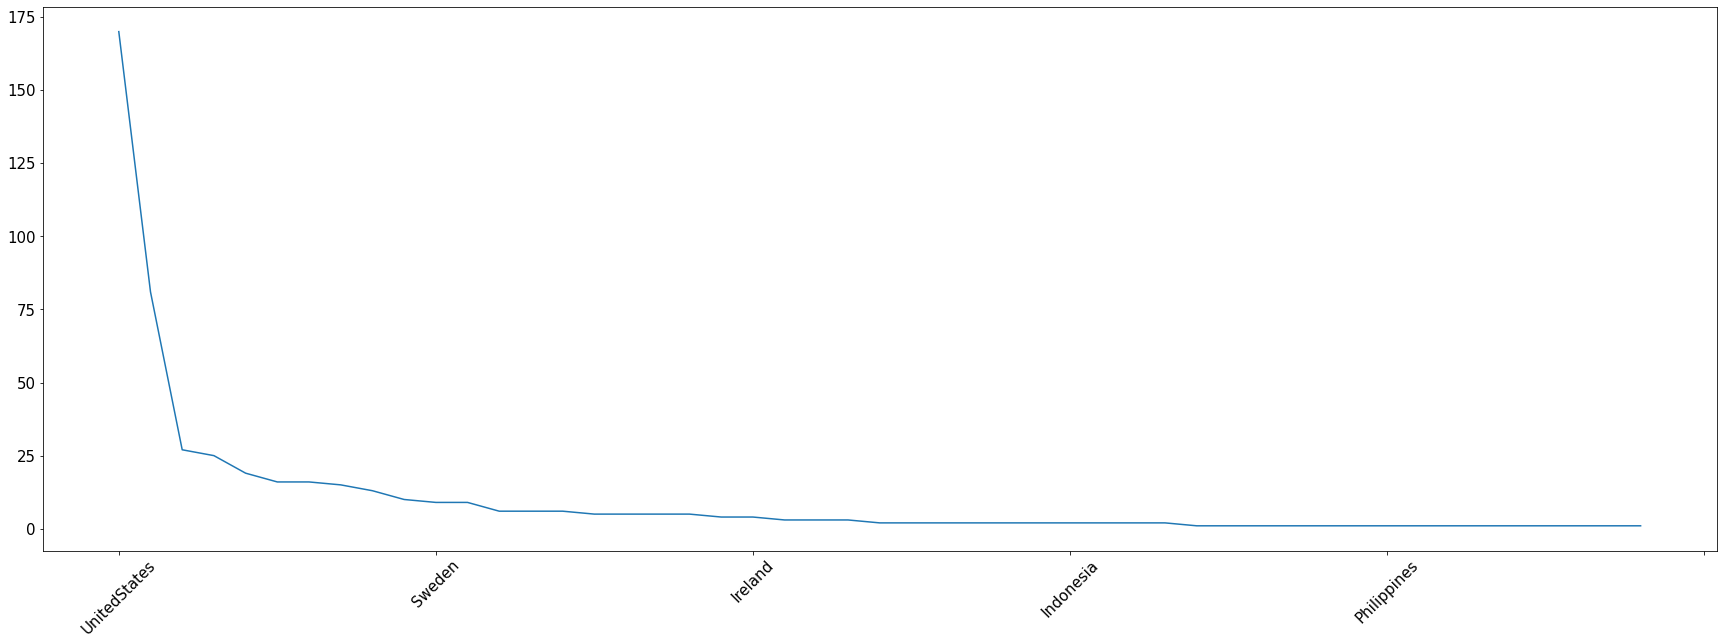

In [31]:
#countires participation in the dataset
df['Country'].value_counts().plot(kind = 'line', rot = 45, sort_columns = True, figsize = (30,10), fontsize = 15)
df['Country'].value_counts()

##### Industry

In [32]:
#no.of.unique industries are 
print("no.of.unique industries are ",df['Industry'].nunique())

no.of.unique industries are  16


In [33]:
#Unique Industries are 
print("Unique Industries are ",df['Industry'].unique())

Unique Industries are  ['Technology' 'Consumer' 'Diversified' 'Energy' 'Industrial' 'Retail'
 'Food&Beverage' 'Finance' 'Commodities' 'Real Estate' 'Entertainment'
 'Health Care' 'Media&Telecom' ' Media&Telecom' 'Services' 'Islands']


In [34]:
#Industry with highest participation
df['Industry'].value_counts().head(1)

Technology    87
Name: Industry, dtype: int64

In [35]:
#Industry with lowest participation
df['Industry'].value_counts().tail(1)

Islands    1
Name: Industry, dtype: int64

In [36]:
#Industries that  involved the top 5 billionaires are
df['Industry'].head(5)

Rank
1    Technology
2    Technology
3      Consumer
4    Technology
5    Technology
Name: Industry, dtype: object

Technology        87
Industrial        57
Finance           55
Diversified       45
Consumer          39
Real Estate       33
Retail            32
Food&Beverage     30
Health Care       30
Energy            27
Media&Telecom     22
Commodities       18
Services          13
Entertainment     10
 Media&Telecom     1
Islands            1
Name: Industry, dtype: int64

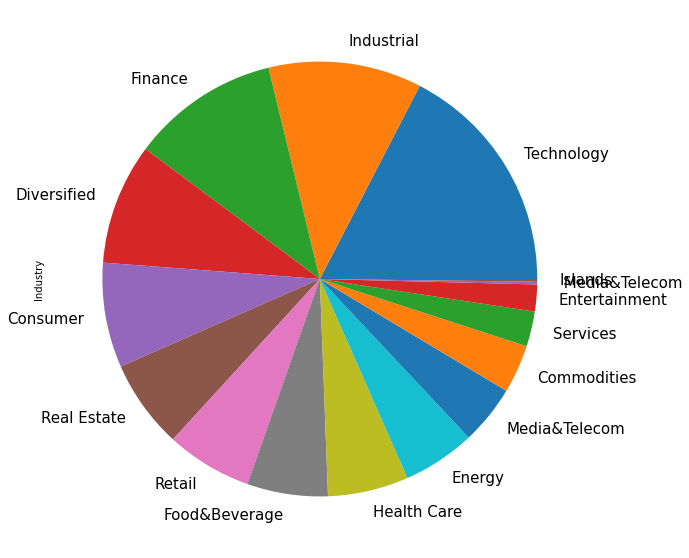

In [37]:
#showing the participation of each industries
df['Industry'].value_counts().plot(kind = 'pie', rot = 45, sort_columns = True, figsize = (20,10), fontsize = 15)
df['Industry'].value_counts()

# Two-Column analysis

In [42]:
df

,Name,Total_Net_Worth,Country,Industry
Rank,,,,
1,Elon Musk,311.00,UnitedStates,Technology
2,Jeff Bezos,195.00,UnitedStates,Technology
3,Bernard Arnault,167.00,France,Consumer
4,Bill Gates,136.00,UnitedStates,Technology
5,Larry Page,131.00,UnitedStates,Technology
...,...,...,...,...
496,Barry Diller,5.92,UnitedStates,Technology
497,Cliff Obrecht,5.89,Australia,Services
498,Melanie Perkins,5.89,Australia,Services


Text(0.5, 1.0, 'Billionaires data_set')

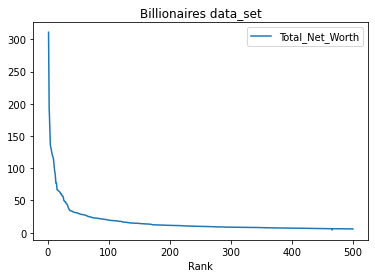

In [44]:
#sns.heatmap(data=df)
sns.lineplot(data=df)
#sns.boxplot(data=df)

plt.title("Billionaires data_set")

Text(0.5, 0, 'Rank')

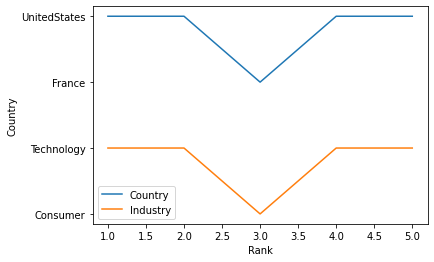

In [45]:
sns.lineplot(data=df['Country'].head(),label='Country')
sns.lineplot(data=df['Industry'].head(),label='Industry')
plt.xlabel('Rank')



Text(0.5, 0, ' Total_Net_Worth (in Billions)')

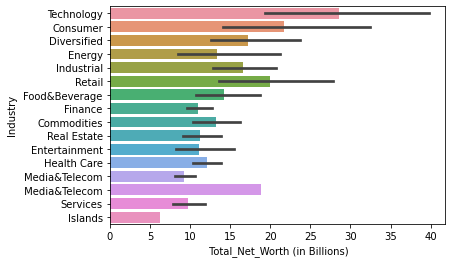

In [46]:
sns.barplot(x=df.Total_Net_Worth,y=df['Industry'])
plt.xlabel(" Total_Net_Worth (in Billions)")

<AxesSubplot:xlabel='Industry', ylabel='Name'>

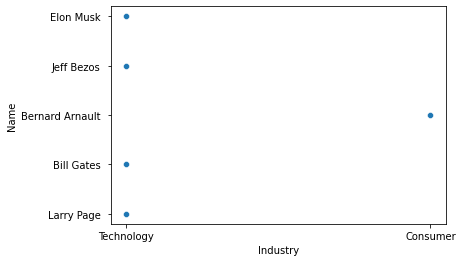

In [48]:
sns.scatterplot(x=df['Industry'],y=df['Name'].head())

<AxesSubplot:xlabel='Industry', ylabel='Name'>

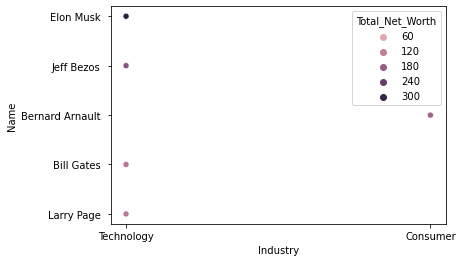

In [49]:
sns.scatterplot(x=df['Industry'],y=df['Name'].head(),hue=df['Total_Net_Worth'])

<AxesSubplot:xlabel='Industry', ylabel='Country'>

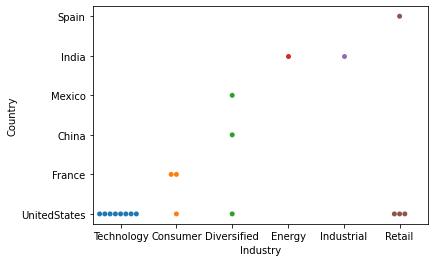

In [51]:
sns.swarmplot(x=df['Industry'].head(20),y=df['Country'].head(20))#categorical scatter plot to plot the categorical values

<AxesSubplot:xlabel='Total_Net_Worth'>

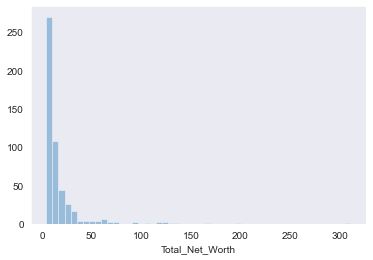

In [66]:
sns.set_style("dark")#to change the theme of the graph
#"darkgrid""whitegrid""dark""white""ticks"
sns.distplot(a=df['Total_Net_Worth'],kde=False)

<AxesSubplot:>

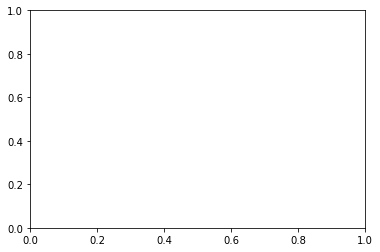

In [61]:
sns.kdeplot(a=df['Total_Net_Worth'],shade=True)#kernel density estimate (KDE)